# LendingClub Final Project
# <img style="float: left; padding-right: 300px; width: 800px" src="LendingClub.JPG"> 

<br/>
<br/>
<br/>
<br/>
<br/>

Harvard University <br/>
Summer 2018 <br/>
Group Members include Vikram Maduskar, Robert Persichitte, Pavan Reddy, and Catherine Williams
 <br/>
   <hr style="height:2pt">

# Introduction  
Table of Contents: 
1.	Motivation
2.	Problem Statement
3.	Introduction and Description of Data
4.	EDA
5.	Results and Conclusion
6.  Appendix - Models


# <img style="float: left; padding-right: 300px; width: 800px" src="AI.png">



# 1. Motivation

LendingClub is the first peer-to-peer lending network to register with the Securities and Exchange Commission(SEC). The LendingClub platform connects borrowers to investors and facilitates the payment of loans ranging from 40,000.  

The basic idea is that borrowers apply for a loan on the LendingClub Marketplace. Investors can review the loan applications, along with risk analysis provided by LendingClub, to determine how much of the loan request they are willing to fund. When the loan is fully funded, the borrower will receive the loan. Investors can also choose to have loans selected manually or automatically via a specified strategy. Loan details such as grade or subgrade, loan purpose, interest rate, and borrower information can all be used to evaluate a loan for possible investment.  

As part of this marketplace, LendingClub makes a significant amount of the loan data that is available to investors available online. Investors can make their own investment decisions and strategies based on the information provided by LendingClub.  

As with other types of loan and investment platforms, Lending Club is the site of possible discrimination or unfair lending practices. Note that Lending Club is an "Equal Housing Lender" (logo displayed in the bottom of each page of the website) which means that "the bank makes loans without regard to race, color, religion, national origin, sex, handicap, or familial status." Such policies in the past have failed to stop discrimination, most publicly against loan applicants of color, especially African American applicants. Racial discrimination has continued in new forms following the federal Fair Housing Act; investors have adapted their approach to fit within the guidelines of the law while maintaining results with damaging and immoral effects on communities of color. Other systems do not explicitly discriminate against minorities but enable practices such as refusing loans from specific zip codes that in effect harm minority applicants.

### Project Objective:
#### Create a model to choose Lending Club investments that maximize expected return.  
The goal of the analysis was to choose a model that maximized the expected rate of return on investments. We considered the predictors that would be available to an investor at the time of purchase and which of them would be useful for our prediction. We considered which variables might be a good indicator of lifetime return. We also considered the risks and limitations of our predictions. <br/>

# 2. Problem Statement and Project Goals: 

As LendingClub investors, our goal is simply to find the subset of borrowers to whom we can lend most profitability in alignment with our return and risk profile. This can be done by either finding the highest return generating borrow sub-group for a given level of default risk, OR by finding the borrower sub-group with the lowest default risk for a given level of return required over and above our cost of funding. Furthermore, we seek to execute our investment strategy ethically whereby our model does not explicitly or implicitly discriminates against any borrowers on the basis of race, color, religion, national origin, sex, handicap, or familial status. <br/>

We therefore would propose to build and evaluate a data-driven and ethical model to power our investment strategy that optimizes our investment strategy by analyzing various factor variables in the data set that impact return and default risk. While doing so, our model also considers fairness and interpretability without substantial losses to efficacy.

# 3. Description of Data

The data from LendingClub is freely available online. The data is updated quarterly, and is split into two sets:
1. **Loan Data** These files contain complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the “present“ contains complete loan data for all loans issued through the previous completed calendar quarter.
2. **Declined Loan Data** These files contain the list and details of all loan applications that did not meet LendingClub’s credit underwriting policy. 

## Predictor Variables 
Determining effective predictors for the Lending Club data set is challenging for a few reasons. The data set has many variables (150+) and one would need separate appropriate response variables (discussed in the next section) from the full set of features based on study goals.
But the sheer number of remaining variables results in a number of additional complications that need to be accounted for:
	Predictors available at time of loan underwriting
	Descriptive vs predictive data
	Sparse data
	Categorical data 
	String data
	Collinear features

## Predictors available at underwriting:
Before building a model, we needed to understand the variables are actually known at the time of loan decision vs being collected throughout the life cycle of the loan? Clearly this would impact the fidelity of our model. We have flagged which variables would likely be available to loan underwriters but will further review to make sure we can utilize all relevant factors.

## Descriptive variables:
There may be multiple variables which are more of a descriptive nature vs having predictive value. We have reviewed the data set for these types of variables (URL for example) but will take another pass in the coming weeks.

## Sparse data:
Much of the data is sparse (no value i.e. NaN) and we need an appropriate strategy to either fill in a value, remove that observation, or remove that variable. We note that removing observations without completely available data would limit our data set to 8000+ rows (from a total of 1.8M+ observations). We will examine if there is an effective fill strategy but for now we are removing the sparsest variables from the data set which leaves us around 800K+ observations to work with.

## Categorical data:
The data set seems to have categorical data of potential predictive which we have transformed using one-hot encoding. These variables include: 'application_type', 'term', 'verification_status', and 'home_ownership'.

## String data:
The data set also includes string data that could be useful if transformed into appropriate formats including factors like length of employment, interest rates, and revolving credit.

## Collinear features:
Finally, there are a significant number of features (34) which exhibit high correlation. One presumes it should be possible reduce total feature count by 17.

## Response Variable:
We needed to choose a variable to assess the expected return of an investment. We ultimately chose the total amount of repayments to assess the expected return. To understand why that is the best predictor, I will first explain some of the alternatives we considered and the limitations in all the possible variables to assess. We researched as predictors loans that were current or paid in full, loans that were charged, and the total amount of repayments.
The predictors for loans that are current or paid in full and loans that were charged off can all be assessed with a simple logistic regression. Having an accurate idea of the chances of a loan being successfully repaid is essential to both predictors. First, looking at loans that are current gives us the advantage of seeing more recent observations—namely loans that have been issued within the last 60 months and are currently in repayment. Having more recent data would overcome some of the challenges of assessing the effect of broader economic trend on a borrower’s ability to pay. Looking at loans that have been charged off would give us an idea of which loans are riskiest. Knowing that information, we could select investments that have the lowest probability of being charged off. It is the same basic principle as looking for loans that are current but looking for loans that have become totally worthless. There is a category of loans somewhere in the middle which is loans that are either in a hardship payment plan or simply late on payments. We will have to define our categorical boundaries to include or exclude these values. That categorization is challenging because loans with late payment–and late fees–may end up being a better expected return.

The biggest limitation of building a model that predicts the likelihood of repayment is the impact on total return. Because riskier loans have higher interest rates, it may be better to select the risky loans, and accept losses from defaults hoping that the high interest rate will offset any losses. A model predicting repayment does not help us determine the appropriate balance between risk and interest rate.

To account for the problems mentioned above, we chose as our response variable $(Total Payments Received)/(Original Loan Amount)$. In other words, we are looking at the total return compared to the amount invested. A \\$25 loan that was charged off after received \\$5 in payments would have a value of 0.2. A \\$25 loan that was paid in full including \\$10 of interest would have a value of 1.4. This encompasses total return of an individual loan. By encompassing total return of individual loans, we can predict the expected value of a group of loans.

This variable still has limitations. First, we must limit our analysis to loans that will have no future expected payments. In other words, we can only look at loans that have been paid in full or charged off. This means we will have to look at loans that have fully run their course which can take up 60 months or more if the loan was deferred at any point. Second, we do not have information about when the payments were made. A loan could have had no payments for 90 days and then paid principle, interest, and late fees. In other cases, the borrower may choose to pay the loan in full before the maturity date. Because we cannot calculate these nuances, we will only consider the return over the lifetime of the loan. 

Based on the data, it appears that joint applications are a fairly new development in these data. We see only about 50,000 instances where the data are included for joint applications. The following visualization shows the relationship for income in joint applicants.

# 4. Exploratory Data Analysis

As part of the EDA, we need to know which values are categorical. Initially we created a scatter plot to initially explore the data. Here income and joint income are the two variables in our scatter plot. In this plot we were able to see that the majority of the income was grouped below \\$500,000 jointly and \\$300,000 individually. 
 
Beyond this, we then started to visualize the application type of the loan. We did this both by the loan amount individually and jointly as a bar chart and a violin plot. 
 

In the below heat map,  we ran correlations with all available variables.
 
Then we regularized the data and looked for the regressor that, when considered independently had the highest impact on the model. 
 
By far, total Revolving Debt limit has the biggest impact in terms of magnitude. We should keep this as the one regressor to represent revolving debt. This will help us to eliminate multicollinearity. This led us to next explore the impact this would have on our correlation matrix:
 
We still see some multicollinearity with the loan payment section. Total payments is one of the planned Y variables. For instances where it has high correlation, we expect to see strong relationships.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

#import statsmodels.api as sm,

import seaborn as sns; sns.set()

from pandas.core import datetools
%matplotlib inline


In [3]:
converters = dict(
    id=str,
    desc=str,
    hardship_type=str,
    hardship_reason=str,
    hardship_status=str,
    hardship_loan_status=str,
    verification_status_joint=str
)
dates = [
    'next_pymnt_d',
    'hardship_start_date',
    'hardship_end_date',
    'payment_plan_start_date',
    'earliest_cr_line',
    'issue_d'
]

In [4]:
# Imports loan data

df = pd.DataFrame()
basepath='./Source Data/Loan Data/'
files = os.listdir(basepath)
csvs = []

for file in files:
    if re.match('.*csv$',file):
        csvs += [file]

if 0:
    #ignore this - was trying to pickle the data into
    #formats like feather, hdf5, native python pickling, etc
    # but found issues on python 3.7
    df=pd.read_pickle(basepath+'df.pkl')
else:
    cols = df.dtypes
    for csv in csvs:
        path = basepath + csv
        #print("Reading",path)
        tdf = pd.read_csv(path,header=1,low_memory=False)
        df=df.append(tdf)
    
df.reset_index(inplace=True) # This will help with joining back data if necessary.

print(df.shape)

(1873317, 152)


In [5]:
pd.set_option('display.max_rows', 200)
#print(df.dtypes)
pd.set_option('display.max_rows', 200)

In [6]:
# Checks for duplicates within our combined data
#df['count']=1 # Generate field to measure the number of occurances

#counts = df.groupby('id')['count'].count()
#print('Data are duplicated %i times.' % len(counts[counts>1]))

Data are duplicated 0 times.

Some data are not useful as a predictor. Because we are going to use these data as a training set, we need to remove data that are not useful for predictions. There are two categories of data that are not useful for predictions. First, we need information about loans that have fully run their course. That is to say, we need to see loans that have either been paid in full or written off. It is not useful to see loans that are currently delinquent or current on payments but still early in the loan. Second, we need to remove predictors that are not import for predicting the loan. For example the URL has no impact on the borrower's ability to repay the loan. If we need this data in the future, we can still pair it back with the original dataframe.

In [7]:
has_data = {}
for column in df.columns:
    has_data[column] = len(df[column].dropna())
#print(len(has_data))
#has_data

order_has_data=sorted(has_data, key=lambda dict_key: has_data[dict_key])

top_sparse=50
for i,j in zip(order_has_data[0:top_sparse],range(top_sparse)):
    print(j, i, has_data[i])

0 member_id 0
1 orig_projected_additional_accrued_interest 5846
2 hardship_type 7288
3 hardship_reason 7288
4 hardship_status 7288
5 deferral_term 7288
6 hardship_amount 7288
7 hardship_start_date 7288
8 hardship_end_date 7288
9 payment_plan_start_date 7288
10 hardship_length 7288
11 hardship_dpd 7288
12 hardship_loan_status 7288
13 hardship_payoff_balance_amount 7288
14 hardship_last_payment_amount 7288
15 sec_app_mths_since_last_major_derog 18992
16 debt_settlement_flag_date 21652
17 settlement_status 21652
18 settlement_date 21652
19 settlement_amount 21652
20 settlement_percentage 21652
21 settlement_term 21652
22 sec_app_revol_util 54417
23 revol_bal_joint 55366
24 sec_app_fico_range_low 55367
25 sec_app_fico_range_high 55367
26 sec_app_earliest_cr_line 55367
27 sec_app_inq_last_6mths 55367
28 sec_app_mort_acc 55367
29 sec_app_open_acc 55367
30 sec_app_open_act_il 55367
31 sec_app_num_rev_accts 55367
32 sec_app_chargeoff_within_12_mths 55367
33 sec_app_collections_12_mths_ex_med 5

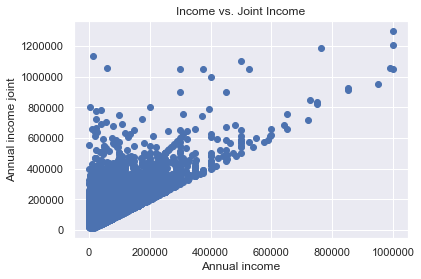

In [8]:
joint_fil = (df['annual_inc']>0)&(df['annual_inc_joint']>0)
plt.scatter(df[joint_fil]['annual_inc'],df[joint_fil]['annual_inc_joint'])
plt.title('Income vs. Joint Income')
plt.xlabel('Annual income')
plt.ylabel('Annual income joint')
plt.show;


Because of the high risk of multicolinearity, and the small number of observations, we are dropping this from the dataset. We will still keep a dummy variable that treats joint applications differently, but we will not consider the joint income of applicants.

In [9]:
# Convert dates to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

#determine age of credit line prior to loan issue and convert to integer
# days of credit history
df['earliest_cr_line'] = (df['issue_d']-df['earliest_cr_line']).dt.days

# convert issue_d to a year to consider economic conditions
#SHOULD WE GO TO QUARTERS?
df['issue_d'] = df['issue_d'].dt.year

print(df.shape)

(1873317, 152)


In [10]:
# Limit to loans that are paid in full or written off. Uses dates so that 
# loans that are delinquent are not disproportionaltely dropped from data

mature_filter = (df['loan_status']=='Fully Paid')|(df['loan_status']=='Charged Off')
#mature_filter = (df['loan_status']=='Fully Paid')
#latest_mature = df[~mature_filter]['issue_d'].min()
#latest_mature
#reduced_df = df[df['issue_d']<=latest_mature]
reduced_df = df[mature_filter] # Pulls only loans that are charged off or paid in full.
#
## Use my documentation to filter to only 
data_dict = pd.read_excel('./Source Data/LCDataDictionary.xlsx',sheet_name='LoanStats')
features = list(data_dict[data_dict['Useful Predictor']=='Yes']['LoanStatNew'].values)
kaggle_features=["addr_state", "annual_inc", "delinq_2yrs", "desc", "dti", "earliest_cr_line", "emp_length",
                 "emp_title", "grade", "home_ownership", "id", "inq_fi", "inq_last_6mths", "installment",
                 "int_rate", "loan_amnt", "loan_status", "mths_since_last_delinq", "mths_since_last_major_derog",
                 "mths_since_last_record", "open_acc", "pub_rec", "purpose", "pymnt_plan", "revol_bal",
                 "revol_util", "sub_grade", "term", "title", "total_acc", "url", "verification_status", "zip_code"]
#reduced_df=reduced_df[features]
non_kaggle_features=['application_type','fico_range_low','fico_range_high',"total_pymnt"]
reduced_df=reduced_df[kaggle_features+non_kaggle_features]

# Combines fields when necessary
reduced_df['fico_est'] = (reduced_df['fico_range_low']+reduced_df['fico_range_high'])/2

reduced_df.drop(columns=['fico_range_low','fico_range_high'],inplace=True)

print(reduced_df.shape)

(1020552, 36)


In [11]:
# Convert strings to numbers emp_length, int_rate, revol_util
emp_length_map={'10+ years':10, '< 1 year':0, '1 year':1, '3 years':3, '8 years':8, '9 years':9,
                '4 years':4, '5 years':5, '6 years':6, '2 years':2, '7 years':7}

reduced_df['emp_length']=reduced_df['emp_length'].replace(pd.Series(emp_length_map))

grade_map={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7}
reduced_df['grade']=reduced_df['grade'].replace(pd.Series(grade_map))

reduced_df['int_rate']=reduced_df['int_rate'].apply(lambda x: float(x[:-1]))
reduced_df['revol_util']=reduced_df['revol_util'].apply(lambda x:
                                                        x[:-1] if isinstance(x, str) else np.nan).astype(float)

reduced_df['earliest_cr_line']=reduced_df['earliest_cr_line'].apply(lambda x:
                                                        0.0 if np.isnan(x) else x)

reduced_df.drop(columns=['title','emp_title','desc','url','id','sub_grade','addr_state','zip_code'],inplace=True)

print(reduced_df.shape)

(1020552, 28)


In [12]:
n_options = {}
for column in reduced_df.columns:
    n_options[column] = len(reduced_df[column].unique())
#n_options
order_n_options=sorted(n_options, key=lambda dict_key: n_options[dict_key])

for i in order_n_options[0:50]:
    print(i, n_options[i],reduced_df[i].unique())

pymnt_plan 1 ['n']
loan_status 2 ['Fully Paid' 'Charged Off']
term 2 [' 36 months' ' 60 months']
application_type 2 ['Individual' 'Joint App']
verification_status 3 ['Verified' 'Source Verified' 'Not Verified']
home_ownership 6 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
grade 7 [2 3 1 5 6 4 7]
inq_last_6mths 10 [ 1.  5.  2.  0.  3.  4.  6.  7.  8. nan]
emp_length 12 [10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]
purpose 14 ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
delinq_2yrs 30 [ 0.  2.  3.  1.  4.  6.  5.  8.  7.  9. 11. 15. 13. 10. 12. 17. 18. 29.
 24. 14. 21. 22. 19. 16. 30. 26. 20. 27. 39. 25.]
inq_fi 30 [nan  2.  0.  1.  5.  3.  4.  6. 16.  7.  9. 10. 11. 13. 17.  8. 12. 14.
 15. 24. 20. 21. 18. 19. 23. 28. 22. 25. 27. 32.]
pub_rec 34 [ 0.  1.  2.  3.  4.  5.  6.  9.  8.  7. 11. 49. 10. 54. 12. 18. 19. 16.
 15. 40. 63. 13. 21. 34.

annual_inc 53722 [ 24000.    30000.    12252.   ...  52979.94 162537.    89625.39]
revol_bal 75740 [ 13648.   1687.   2956. ...  61950.  61356. 141952.]
installment 76852 [ 162.87   59.83   84.33 ...  162.95  605.   1142.33]
total_pymnt 968429 [ 5863.1551867   1014.53        3005.66684414 ...  7428.09944457
 12483.1542331  14662.94701135]


Based on these results, we will have to encode several data as dummy variables:

- application_type
- term
- verification_status
- home_ownership
- purpose


In [13]:
seta=set(reduced_df.columns)

reduced_df=pd.get_dummies(data=reduced_df,columns=['pymnt_plan','loan_status','application_type','term',
                                                   'verification_status',
                                                   'home_ownership','purpose'],
                          drop_first=True)


setb=set(reduced_df.columns)
print(setb-seta)
print(reduced_df.shape)

{'purpose_moving', 'verification_status_Verified', 'home_ownership_OTHER', 'home_ownership_OWN', 'loan_status_Fully Paid', 'purpose_home_improvement', 'term_ 60 months', 'purpose_debt_consolidation', 'purpose_wedding', 'verification_status_Source Verified', 'home_ownership_RENT', 'application_type_Joint App', 'purpose_credit_card', 'purpose_major_purchase', 'purpose_educational', 'home_ownership_NONE', 'purpose_house', 'purpose_vacation', 'purpose_other', 'purpose_medical', 'purpose_renewable_energy', 'home_ownership_MORTGAGE', 'purpose_small_business'}
(1020552, 44)


## How to treat NaN?

For now, let's remove majority NaN columns...

In [14]:
has_data = {}
for column in reduced_df.columns:
    has_data[column] = len(reduced_df[column].dropna())
has_data

order_has_data=sorted(has_data, key=lambda dict_key: has_data[dict_key])

top_sparse=25
for i,j in zip(range(top_sparse),order_has_data[0:top_sparse]):
    print(i,j, has_data[j])

0 mths_since_last_record 172185
1 mths_since_last_major_derog 264308
2 inq_fi 296093
3 mths_since_last_delinq 503506
4 emp_length 965386
5 revol_util 1019945
6 dti 1020435
7 inq_last_6mths 1020551
8 annual_inc 1020552
9 delinq_2yrs 1020552
10 earliest_cr_line 1020552
11 grade 1020552
12 installment 1020552
13 int_rate 1020552
14 loan_amnt 1020552
15 open_acc 1020552
16 pub_rec 1020552
17 revol_bal 1020552
18 total_acc 1020552
19 total_pymnt 1020552
20 fico_est 1020552
21 loan_status_Fully Paid 1020552
22 application_type_Joint App 1020552
23 term_ 60 months 1020552
24 verification_status_Source Verified 1020552


In [15]:
nonnan_df=reduced_df.fillna(0)
#nonnan_df=reduced_df.drop(columns=order_has_data[0:4])
print(nonnan_df.shape)
print(len(reduced_df.dropna()),len(nonnan_df.dropna()))

(1020552, 44)
14988 1020552


In [16]:
nonnan_df=nonnan_df.dropna()
print(nonnan_df.shape)

n_options = {}
for column in nonnan_df.columns:
    n_options[column] = len(nonnan_df[column].unique())
#n_options
order_n_options=sorted(n_options, key=lambda dict_key: n_options[dict_key])

for i in order_n_options[0:49]:
    print(i, n_options[i],nonnan_df[i].unique())

(1020552, 44)
loan_status_Fully Paid 2 [1 0]
application_type_Joint App 2 [0 1]
term_ 60 months 2 [0 1]
verification_status_Source Verified 2 [0 1]
verification_status_Verified 2 [1 0]
home_ownership_MORTGAGE 2 [0 1]
home_ownership_NONE 2 [0 1]
home_ownership_OTHER 2 [0 1]
home_ownership_OWN 2 [0 1]
home_ownership_RENT 2 [1 0]
purpose_credit_card 2 [1 0]
purpose_debt_consolidation 2 [0 1]
purpose_educational 2 [0 1]
purpose_home_improvement 2 [0 1]
purpose_house 2 [0 1]
purpose_major_purchase 2 [0 1]
purpose_medical 2 [0 1]
purpose_moving 2 [0 1]
purpose_other 2 [0 1]
purpose_renewable_energy 2 [0 1]
purpose_small_business 2 [0 1]
purpose_vacation 2 [0 1]
purpose_wedding 2 [0 1]
grade 7 [2 3 1 5 6 4 7]
inq_last_6mths 9 [1. 5. 2. 0. 3. 4. 6. 7. 8.]
emp_length 11 [10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7.]
inq_fi 29 [ 0.  2.  1.  5.  3.  4.  6. 16.  7.  9. 10. 11. 13. 17.  8. 12. 14. 15.
 24. 20. 21. 18. 19. 23. 28. 22. 25. 27. 32.]
delinq_2yrs 30 [ 0.  2.  3.  1.  4.  6.  5.  8.  7.  

dti 5647 [27.65  1.    8.72 ... 98.8  69.62 65.24]
annual_inc 53722 [ 24000.    30000.    12252.   ...  52979.94 162537.    89625.39]
revol_bal 75740 [ 13648.   1687.   2956. ...  61950.  61356. 141952.]
installment 76852 [ 162.87   59.83   84.33 ...  162.95  605.   1142.33]
total_pymnt 968429 [ 5863.1551867   1014.53        3005.66684414 ...  7428.09944457
 12483.1542331  14662.94701135]


## What factors are correlated?

In [17]:
#correlatable columns
corr_columns = order_n_options[23:]
print(nonnan_df[corr_columns].dtypes)

grade                            int64
inq_last_6mths                 float64
emp_length                     float64
inq_fi                         float64
delinq_2yrs                    float64
pub_rec                        float64
fico_est                       float64
open_acc                       float64
mths_since_last_record         float64
total_acc                      float64
mths_since_last_delinq         float64
mths_since_last_major_derog    float64
int_rate                       float64
revol_util                     float64
loan_amnt                      float64
earliest_cr_line               float64
dti                            float64
annual_inc                     float64
revol_bal                      float64
installment                    float64
total_pymnt                    float64
dtype: object


Factors with high correlation (> +/-0.7) are:
	 0 grade vs int_rate = 0.9536114143945985
	 1 int_rate vs grade = 0.9536114143945984
	 2 loan_amnt vs installment = 0.9534684520154317
	 3 loan_amnt vs total_pymnt = 0.846491557976213
	 4 installment vs loan_amnt = 0.9534684520154317
	 5 installment vs total_pymnt = 0.8106348318551941
	 6 total_pymnt vs loan_amnt = 0.846491557976213
	 7 total_pymnt vs installment = 0.8106348318551941


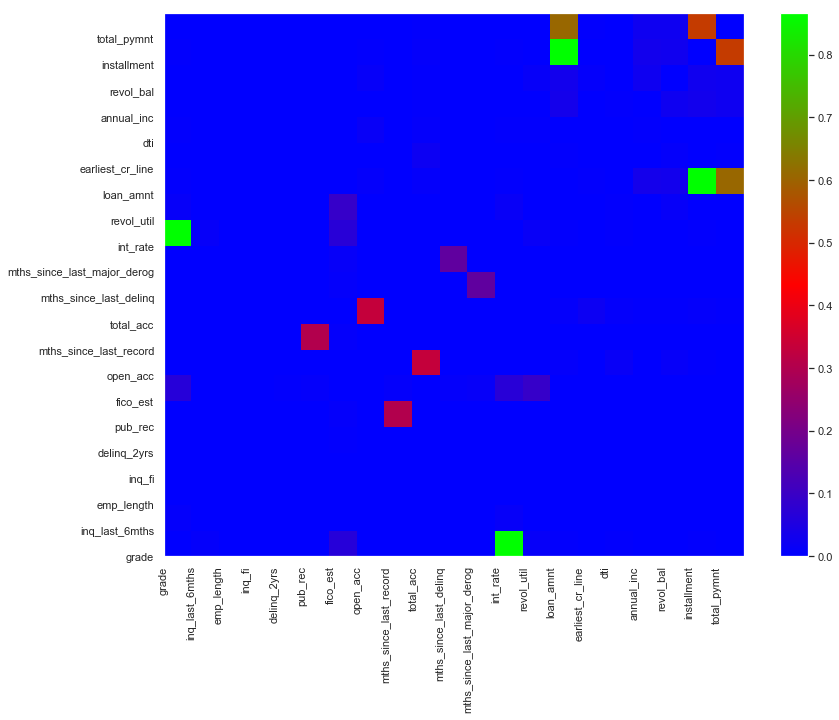

In [18]:
corr_df=nonnan_df[corr_columns]

matrix=np.corrcoef(corr_df,rowvar=False)-np.eye(len(corr_df.columns))


i,j=np.nonzero(abs(matrix) > 0.7)
print("Factors with high correlation (> +/-0.7) are:")
for k in range(len(i)):
    print("\t",k,corr_df.columns[i[k]],"vs",corr_df.columns[j[k]],"=",matrix[i[k]][j[k]])
    

# cube each value to highlight higher correlation elements
matrix=abs(matrix**3)
plt.figure(figsize=(13,10))
plt.pcolor(matrix,cmap='brg')

plt.xticks(range(len(corr_df.columns)), corr_df.columns,rotation='vertical')
plt.yticks(range(len(corr_df.columns)), corr_df.columns)
plt.colorbar(cmap='brg')
plt.show()

## Removing redundancy
We see that some of the factors in this dataset are two ways of measuring the same thing. For example, interest rates (`int_rate`) and the grading of the loan (`grade`) two ways of saying the same thing. A lower grade of loan indicates higher risk and higher risk is offset with a higher interest rate. Indeed, we see a large amount of correlation between the two fields.

As another example, we can see the percentage of bankcard accounts > 75% of the limit (`percent_bc_gt_75`) is highly correlated with the utilization of bank cards(`revol_bal`). Both of these are similar to the maximum amount of credit utilization (`total_rev_hi_lim`).

For this reason we need to select variables with high correlation and choose the variables that will have the biggest impact on our model. I have created the following groups that will need to be consolidated.

## High-Magnitude Factors
We ran code that regularizes the data and then looks for the regressor that, when considered independently has the higest impact on the model.

By far, total Revolving Debt limit has the biggest impact in terms of magnitude. We should keep this as the one regressor to represent revolving debt. This will help us to eliminate multicolinearity. Let's explore the impact this has on our correlation matrix

Note:
I did not perform the same analysis for the grade and interest rate. The loans are structured so that the grade determines the range of interest rates. The steps within the grade specifically determine the interest rate. Therefore, the grade the step and the rate all give the same information, but the rate gives the specific detail.

Note: In the new dataset, I replace the payment amount with the percentage of income that is dedicated to the payment. We can have all the factors to calculate loan amount (term, rate, and original balance) as individual regressors. Replacing it will still capture a critical element of the loan amount while removing multicolinearity.

Notes:
- We still see some multicolinearity with the loan payment section. I plan to address additional factors in the factoring for income section.
- Total payments is one of the planned Y variables. For instances where it has high correlation, we expect to see strong relationships.


# Factoring for income
The correlation matrix emphasizes some factors in the data are highly correlated. In some instances, this correlation may be due to the fact that the predictors are dependent on other predictors. For example, we can consider three predictors in concert: the income, the loan repayment and the interest rate assigned by Lending Club. We are assuming that a higher amount of risk is related to a higher interest rate. That is to say, Lending Club assesses that loans are riskier based on loan to income ratio.

In [21]:
# Shows the relationship between loan repayment and income:
features = ['annual_inc','installment','int_rate']

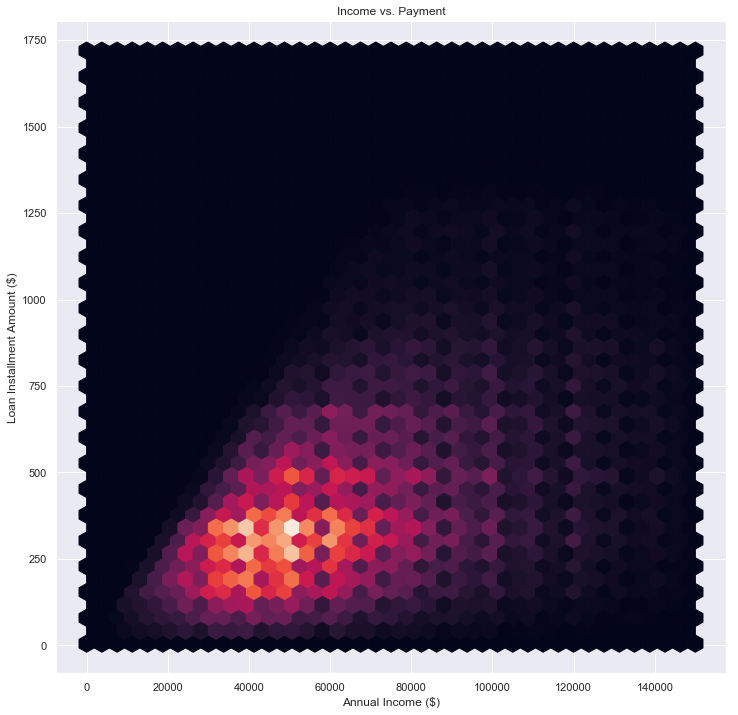

In [22]:
# Large outliers make the trend difficult to understand so I'm making a trimmed df
temp_df = nonnan_df[nonnan_df['annual_inc']<150000][['installment','annual_inc']]
x = temp_df['annual_inc']
y = temp_df['installment']
plt.figure(figsize=(12,12))
plt.hexbin(x,y,gridsize =40)
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Installment Amount ($)')
plt.title('Income vs. Payment')
plt.show()

While it looks like income and loan amount are both approximately normally distributed, we see that there is a clear fan pattern here. No monthly loan payment is larger than approximately 1% of annual income. We may be able to keep valuable information from both datasets and reduce multicolinearity by considering not the individuals variables, but the relationships between them.

In [23]:
nonnan_df['percent_of_income'] = nonnan_df['installment']*12/nonnan_df['annual_inc']
nonnan_df['percent_of_income'].describe()

count    1.020552e+06
mean              inf
std               NaN
min      1.231699e-04
25%      4.688933e-02
50%      7.284552e-02
75%      1.057535e-01
max               inf
Name: percent_of_income, dtype: float64

Because we see some odd cases, I looked up an extreme and found that we see odd values when considering joint incomes. These instances are rare (fewer than 40 cases where total payments are greater than total income). This loan was funded as a joint application. As a result we are going to have to throw out any data about joint applications as it only represents 8000 cases, but creates significant leverage points.

In [24]:
# Testing an extreme example from the
df.iloc[1542746]

index                                                                                     18648
id                                                                                    115381037
member_id                                                                                   NaN
loan_amnt                                                                                 10000
funded_amnt                                                                               10000
funded_amnt_inv                                                                           10000
term                                                                                  60 months
int_rate                                                                                 20.00%
installment                                                                              264.94
grade                                                                                         D
sub_grade                               

In [25]:
nonnan_df = nonnan_df[nonnan_df['application_type_Joint App']==0]

In [26]:
# Additional factors to remove
to_remove=[]
if 'installment' not in to_remove:
    #to_remove += ['installment']
    to_remove += ['total_pymnt','loan_amnt','grade','loan_status_Fully Paid']
features = list(set(nonnan_df.columns) - set(to_remove))

# 5. Models
In this section, we will present all models that have seemed reasonable throughout our analysis. 
## Starting work with training and test sets:

In [27]:
print(df.shape,nonnan_df.shape)

# need to look at interest rate as well!!!
#y=nonnan_df['total_pymnt']/(nonnan_df['installment']*36 + nonnan_df['installment']*nonnan_df['term_ 60 months']*24)
y=nonnan_df['loan_status_Fully Paid']
#y=nonnan_df['total_pymnt']/nonnan_df['loan_amnt']
print(features)
traintest_df=nonnan_df[features]
print(traintest_df.columns)

Xscaler = StandardScaler()
Xscaler.fit_transform(traintest_df)

X_traintune, X_test, y_traintune, y_test = train_test_split(
    traintest_df,y,test_size=0.2)#,random_state=42)#,stratify=nonnan_df[['loan_status']])

X_train, X_tune, y_train, y_tune = train_test_split(
    X_traintune,y_traintune,test_size=0.2)#,random_state=42)#,stratify=nonnan_df[['loan_status']])

print(X_train.shape,X_tune.shape,X_test.shape)

(1873317, 152) (1011023, 45)
['mths_since_last_record', 'purpose_moving', 'earliest_cr_line', 'verification_status_Verified', 'home_ownership_OTHER', 'mths_since_last_delinq', 'home_ownership_OWN', 'pub_rec', 'inq_fi', 'purpose_home_improvement', 'term_ 60 months', 'purpose_debt_consolidation', 'verification_status_Source Verified', 'home_ownership_RENT', 'purpose_wedding', 'application_type_Joint App', 'percent_of_income', 'purpose_credit_card', 'inq_last_6mths', 'revol_bal', 'revol_util', 'int_rate', 'purpose_major_purchase', 'purpose_educational', 'home_ownership_NONE', 'total_acc', 'purpose_house', 'mths_since_last_major_derog', 'fico_est', 'installment', 'annual_inc', 'dti', 'open_acc', 'purpose_vacation', 'delinq_2yrs', 'purpose_other', 'purpose_medical', 'purpose_renewable_energy', 'home_ownership_MORTGAGE', 'emp_length', 'purpose_small_business']
Index(['mths_since_last_record', 'purpose_moving', 'earliest_cr_line',
       'verification_status_Verified', 'home_ownership_OTHER',

# Classifier Final Model
This is the final model for the classification methods.

In [28]:
# your code here
#kfold=KFold(5, shuffle=True)

parameters = {'max_depth':range(1,15)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4,cv=5)
clf.fit(X=X_train, y=y_train)
dtclf = clf.best_estimator_

results=clf.cv_results_

print(tree_model)

print("\nBest decision tree score: {} occurs at depth: {}".format(
    clf.best_score_, clf.best_params_['max_depth']))

print("Decision Tree test prediction accuracy: %f" % accuracy_score(dtclf.predict(X_test),y_test))

KeyboardInterrupt: 

In [ ]:
# your code here
rfclf = RandomForestClassifier(n_estimators=25,max_depth=10)
rfclf.fit(X_train, y_train)

print("Random Forest training prediction accuracy: %f" % accuracy_score(rfclf.predict(X_train),y_train))

print("Random Forest test prediction accuracy: %f" % accuracy_score(rfclf.predict(X_test),y_test))

In [ ]:
# your code here
basic=DecisionTreeClassifier(max_depth=3)
abclf = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.05,
                         base_estimator=basic)
# Train model
abclf.fit(X_train, y_train)

In [ ]:
print("Adaboost test prediction accuracy: %f" % accuracy_score(abclf.predict(X_test),y_test))

In [ ]:
# your code here
fitted_logreg = LogisticRegressionCV().fit(X_train, y_train)
print("Logistic model accuracy: {}".format(fitted_logreg.score(X_test, y_test)))
                                           
#print("\nLogistic coefficients weights:")
#print(*X_train, sep=' ')
#print(*fitted_logreg.coef_[0], sep=' ')


In [ ]:
LCOLSModel = LinearRegression().fit(X_train, y_train)

print(LCOLSModel.intercept_)
print(LCOLSModel.coef_)

# your code here
trainR2 = r2_score(y_train,LCOLSModel.predict(X_train))

testR2 = r2_score(y_test,LCOLSModel.predict(X_test))

print("The training set OLS regression R^2 score is: %f" % trainR2)
print("The test set OLS regression R^2 score is: %f" % testR2)

In [ ]:
lambdas = [.001, .005, 1, 5, 10, 50, 100, 500, 1000]

kfold = KFold(5, shuffle=True) # use this for testing

LCRRModel = RidgeCV(alphas=lambdas, cv=kfold)
LCRRModel.fit(X_train, y_train)
LCRR_shrinkage_parameter=LCRRModel.alpha_

print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(LCRR_shrinkage_parameter,
                                                                            LCRRModel.intercept_,
                                                                            LCRRModel.coef_
                                                                            )
     )

RRtrainR2 = r2_score(y_train,LCRRModel.predict(X_train))
RRtestR2 = r2_score(y_test,LCRRModel.predict(X_test))
print("The training set Ridge regression R^2 score is: %f" % RRtrainR2)
print("The test set Ridge regression R^2 score is: %f" % RRtestR2)

In [ ]:
LCLRModel = LassoCV(alphas=lambdas, cv=kfold)
LCLRModel.fit(X_train, y_train)
LCLR_shrinkage_parameter = LCLRModel.alpha_
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(LCLR_shrinkage_parameter,
                                                                            LCLRModel.intercept_,
                                                                            LCLRModel.coef_
                                                                            )
     )

LRtrainR2 = r2_score(y_train,LCLRModel.predict(X_train))
LRtestR2 = r2_score(y_test,LCLRModel.predict(X_test))
print("The training set Lasso regression R^2 score is: %f" % LRtrainR2)
print("The test set Lasso regression R^2 score is: %f" % LRtestR2)

In [ ]:
coef_df=pd.DataFrame(np.array([X_train.columns,
                               LCOLSModel.coef_,
                               LCRRModel.coef_,
                               LCLRModel.coef_]).T,columns=["feature","OLS","RR","LR"])

In [ ]:
print(coef_df)

# 5. Results and Conclusion

After testing different classification options, our final model shows an accuracy of 0.80. 

**Limitations**  
Any quality research must include information about limitiatons. Our initial concern is that the data set that is available from Lending Club includes loans as early as 2010. Given that the economic trends of our country have not stayed consistent since that time, it is hard to guarantee that predictions made from this data would hold true to today’s economic situations. While we would ideally want to solve for this, our model includes no economic trend data. While we could possibly control for economic trends and time periods of growth and recession in our models, that is beyond the scope of this analysis.

As a potential next step for our analysis we would incorporate broader economic indicators to understand their impact on the expected rate of return on the loans. This would be especially difficult given the complexity of predicting economic trends. While we have retrospective data on borrowers and lenders, there is an advantage to knowing what happened to economic markets while the loan was in repayment. We would not have that information when deciding which loans are suitable for investment. This is a common problem across the entire financial sector. So, while this is not unique to us, it is important to always caution a model’s interpretation with knowledge that because financial data is yet to be perfectly predicted.

Because of this limitation, the actual return of the loans our model chooses may differ from the expected return we calculate. They may differ if the broader economic situation is not as stable as it has been during the period we selected our training data from.

**Conclusion**  
Our model gives users an additional edge in how they choose Lending Club investments. We give users two outputs. First the estimated probability of the loan defaulting. Second, we take this a step further to show the potential return on investment. As shown in the figure below, even loans that default have a chance of making a profit. 

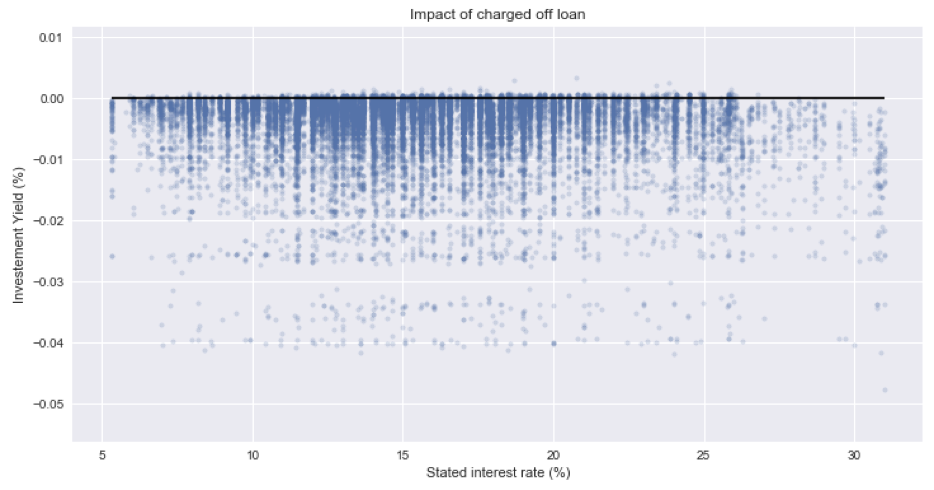

We attempt to predict the amount of return from the loan.
These two factors need to be considered in concert. An unexpected challenge was the fact that loans with higher uncertainty also have a higher interest rate. This mean more potential for gains comes with more potential losses. The grade of the investment indicates the risk as assess by the Lending Club platform. A is the least amount of and G is the highest amount of risk. We see that in the figure below that when considering individual loans grade D has the highest average return on investment; G has the highest return on investment from any class; and A has both the most predictability, but lower upside return. 

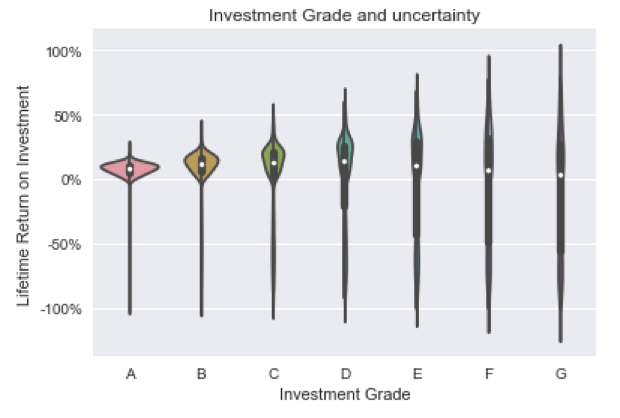

Our regression models predict the percentage of the loan commitment expected to be fulfilled. For example, a value of 100% indicates that we expect the borrower to repay 100% of the commitment. A value of 50% means we expect the borrower to fulfil half of the payments from the loan commitment. This is not the most probable value, but a risk adjusted return of the model. That is to say a loan with a score of 80% may either pay the loan back fully (a true value of 100%) or pay back 60% of the loan. This is only an expected return when considering loans in aggregate, not when considering individual loans. Below is a plot which shows the difference between our predictions and the actual values. You can see there are difference between our values, but the model still gives insights to the successful loans.  


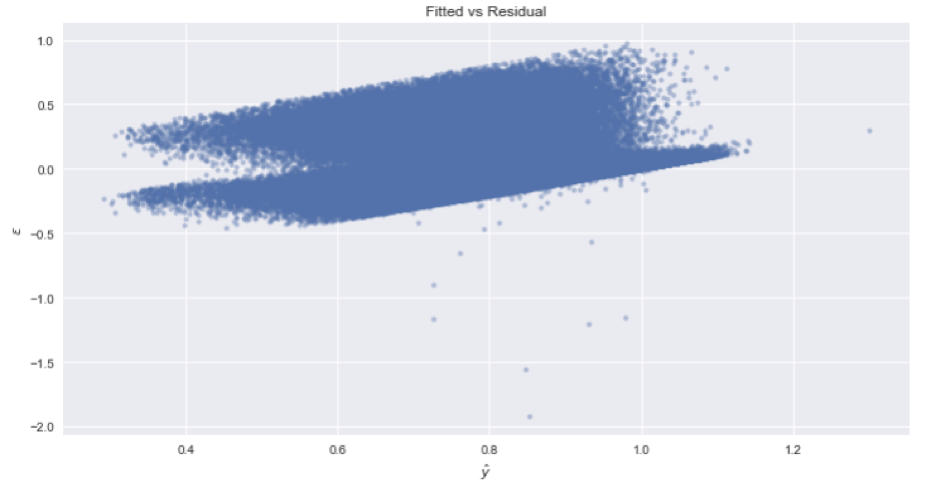

If that seems confusing, you can always stick to the manta that higher is better. You have more expected return on investment for higher numbers.
Our recommendation for any investor is to consider the risks of an investment and how it fits into your overall investment strategy. Portfolio theory states that a balanced portfolio can greatly reduce risk and have only a minor impact on return. For the peer lending component of the portfolio such as the one offered by Lending Club, investors do the following:
1.	Consider your objectives and the risk you are willing to take.
2.	Select the investment class that fits in with your overall strategy.
3.	Use our tool to select (from within that class) the investments with the lowest risk of default and the highest expected payments.

**Next Steps**  
- Additional timeseries research may show why the year of issuance has such high multicolienarity. It is apparent that the quality of the investments is changing as the platform grows and changes, but this was beyond the scope of our project. If we better understand the broader changes in borrowers Lending Club attracts, we can see how that might impact their ability or willingness to repay loans.
- Build a scrubber to pull information about loans that are currently offered. By downloading current loan data, we can apply the model to hundreds of loans to determine which of them gives the best expected return as predicted by our models.
- Perform additional analysis about the confidence interval of our prediction. Because there is still a significant amount of noise in our models, we cannot perfectly predict the future. Giving a more detailed confidence interval about the possible outcomes will give us a better indication of if the investment is suitable for our goals.